# **Proyek Analisis Data: Air Quality Dataset**
- **Nama:** FAIZAL RIZA
- **Email:** akuisal@gmail.com
- **ID Dicoding:** akuisal@gmail.com

## **Menentukan Pertanyaan Bisnis**

* Seperti apa distribusi penjualan produk dengan penjualan tertinggi dan terendah?
* Bagaimana tingkat kepuasan pelanggan pada tahun 2018?
* Bagaimana distribusi penjualan produk tiap bulannya?


## **Import Semua Packages/Library yang Digunakan**

In [1]:
%pip install seaborn
%pip install gdown

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import zipfile
import os
import pathlib
from pathlib import Path
import gdown
import shutil

## **Data Wrangling**

## **Gathering Data**

In [3]:
# Destination file path
directory_file = Path("D:/ZCODE/myCode/dicoding-101")
data_file = Path("D:/ZCODE/myCode/dicoding-101/data/E-commerce-public-dataset.zip")
output_folder = Path("D:/ZCODE/myCode/dicoding-101/data")

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Unzip the file
with zipfile.ZipFile(data_file, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

print("Data extraction completed.")

Data extraction completed.


In [4]:
customers_df = pd.read_csv(directory_file/'data/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation_df = pd.read_csv(directory_file/'data/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items_df = pd.read_csv(directory_file/'data/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payment_df = pd.read_csv(directory_file/'data/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_df = pd.read_csv(directory_file/'data/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_df = pd.read_csv(directory_file/'data/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
product_category_df = pd.read_csv(directory_file/'data/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_df = pd.read_csv(directory_file/'data/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers_df = pd.read_csv(directory_file/'data/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**

1.   Memahami Sumber Data

2.   Memahami Struktur Data
*   Variabel
*   Format Data
*   Missing Value
*   Outlier


### **Assessing Data**

In [13]:
def analyze_table(df):
    # Print info table
    print(f"\n---Info Tabel---\n")
    df.info()

    # Print missing values table
    print(f"\n---Missing Value---\n")
    print(df.isna().sum())

    # Print duplicated values count
    print(f"\n---Duplikat---\n")
    print(df.duplicated().sum())

    # Print table description
    print(f"\n---Deskripsi Tabel---\n")
    print(df.describe())

**Info Tabel Costumer**

In [14]:
analyze_table(customers_df)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

---Missing Value---

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

---Duplikat---

0

---Deskripsi Tabel---

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.

**Info Tabel Geolocation**

In [15]:
analyze_table(geolocation_df)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

---Missing Value---

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

---Duplikat---

261831

---Deskripsi Tabel---

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06


Table geolocation memiliki duplikasi data tapi tidak ada missing data

**Info Tabel order_items**

In [16]:
analyze_table(order_items_df)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

---Missing Value---

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

---Duplikat---

0

---Deskripsi Tabel---

       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.00

kolom shipping_limit_date bukan termasuk tipe data object seharusnya bertipe date

**Info Tabel order_payment**

In [17]:
analyze_table(order_payment_df)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

---Missing Value---

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

---Duplikat---

0

---Deskripsi Tabel---

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051 

**Info Tabel order_reviews**

In [18]:
analyze_table(order_reviews_df)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

---Missing Value---

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

---Duplikat---

0

---Deskripsi Tabel---

       review_score
count  99224.0000

Tabel reviews memiliki 2 kolom dengan missing value, yaitu:
* review_comment_title
* review_comment_message

Tipe data pada kolom  review_creation_date belum bertipe date, masih bertipe data object

**Info Tabel orders**

In [19]:
analyze_table(orders_df)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

---Missing Value---

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date   

**INSIGHT**

1. Tabel geolocation memiliki banyak duplikasi data tetapi tidak memiliki missing data

2. Tabel orders memiliki missing value pada kolom :
  * order_approved_at
  * order_delivered_carrier_date
  * order_delivered_customer_date

3. Tipe data pada kolom order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date masih bertipe object

**Info tabel product_category**

In [20]:
analyze_table(product_category_df)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

---Missing Value---

product_category_name            0
product_category_name_english    0
dtype: int64

---Duplikat---

0

---Deskripsi Tabel---

       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


**Info Tabel products**

In [21]:
analyze_table(products_df)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

---Missing Value---

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
pr

Tabel products memiliki missing values hampir di semua kolom kecuali product_id

**Info Tabel sellers**

In [22]:
analyze_table(sellers_df)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

---Missing Value---

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

---Duplikat---

0

---Deskripsi Tabel---

       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000


**Insight:**

Tabel orders memiliki missing value pada kolom :
* order_approved_at
* order_delivered_carrier_date
* order_delivered_customer_date

Tipe data pada kolom order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date masih bertipe object

### Cleaning Data

**Cleaning duplikasi data pada tabel geolocation **

In [23]:
# Drop duplikat
geolocation_df.drop_duplicates(inplace=True)

geolocation_df.duplicated().sum()

np.int64(0)

**Cleaning data tabel order_items**

In [24]:
order_item_col=['shipping_limit_date']
for col in order_item_col:
    order_items_df[col]=pd.to_datetime(order_items_df[col])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Cleaning Data Tabel order_reviews**

In [25]:
drop_cols = ['review_comment_title', 'review_comment_message']
order_reviews_df.drop(drop_cols, axis= 1, inplace= True)

order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [26]:
order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    order_reviews_df[col]=pd.to_datetime(order_reviews_df[col])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


**Cleaning Data Tabel Orders**

In [27]:
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    orders_df[col]=pd.to_datetime(orders_df[col])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Cleaning Data Tabel products**

In [28]:
# Melakukan drop kolom-kolom yang tidak dipakai di analisis data
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

# Check if columns exist before dropping
existing_cols = [col for col in product_drop_cols if col in products_df.columns]

# Drop only existing columns
products_df.drop(existing_cols, axis=1)

# Melakukan penggantian missing value pada kolom product_category_name dengan modus dan product_photos_qty dengan median
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0])
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
Terdapat missing value pada 2 kolom, yaitu: review_comment_title dan review_comment_message. Drop kolom akan dilakukan karena isi dari 2 kolom tersebut yang berupa text tidak akan digunakan dalam analisis data.


## Exploratory Data Analysis (EDA)

In [29]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
67098,c7c1be68d17bb1a7cf04dd15fc4d9331,92e2600b1049f75778bc8dc7aababdf8,12241,sao jose dos campos,SP
18356,bf654df65423a4716b8ecd654aa356e4,1852429a01e2dd12b065a0a2cacbe1bd,88780,imbituba,SC
26382,c2c4da97389cc67625777ddca20faa00,0e1437d1433e8561302ceb1b3b8e3f4f,80250,curitiba,PR
85247,2a417f0f0717eecc940b00012978be4e,56088651df42926f11ca58a83d36f906,9861,sao bernardo do campo,SP
29297,217344c7c334e16c8e76551b4b240c1d,584455f2e1e703ad4ea6618f833ff1ac,86460,abatia,PR


In [30]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [31]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [32]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight :** Diketahui bahwa customer terbanyak berasal dari Sao Paulo City dan Sao Paulo State

**Explore Tabel orders**

In [33]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
32219,f50f12991ec8bcff03994381dcf9ce08,92dc7fe11830de5c6159644a1b1d84ba,delivered,2017-12-19 20:52:25,2017-12-19 21:53:12,2017-12-22 16:37:23,2017-12-26 20:07:36,2018-01-08
11073,7a18fea05bb2617bc74ee0bd1009c0c7,8a561b232448590a2c52fb35de87d5fd,delivered,2017-09-28 19:50:59,2017-09-28 20:07:09,2017-10-02 21:32:24,2017-10-10 17:47:41,2017-10-20
34842,260da592a3c3072f2c3b9ddc840f8a63,66f3530251fb5d60d0122bb9ee1f82aa,delivered,2017-04-28 21:22:30,2017-04-28 21:35:13,2017-05-02 14:57:51,2017-05-05 15:06:41,2017-05-30
62882,7581e8b8156b3dee7b8898cd0120ad19,75ab1671ae03662536b06efb3762bde3,delivered,2017-04-11 17:56:38,2017-04-11 18:10:25,2017-04-12 18:48:34,2017-04-17 19:04:51,2017-05-03
45297,e6b2afa6b02c9f066002cfdab6d53080,2ad11417e4acb043f847ec065ded3e26,delivered,2017-09-21 21:34:48,2017-09-21 22:48:01,2017-09-22 18:52:35,2017-10-23 15:38:54,2017-10-26


In [34]:
# Hitung Delivery Time
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)


orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
62309,9a3682ac52b77c26f1d7a700b59ed9f7,f98e0cc32e5756e3862f4a9263807270,delivered,2018-07-17 17:11:48,2018-07-17 17:21:34,2018-07-23 14:28:00,2018-07-26 20:04:47,2018-08-17,3.0
10227,cc56a1a4acaf02f1c4732ca37b83ca9c,84e85061282f013a94d02fd9341bf527,delivered,2018-05-30 14:53:39,2018-05-31 03:35:47,2018-06-04 14:50:00,2018-06-06 18:28:35,2018-06-28,2.0
76378,8f743e79746b7603a908c7b536e4a14e,f6fd1a71023d22a9a49c52aaf3a904cb,delivered,2017-08-24 19:54:03,2017-08-25 15:15:15,2017-08-28 15:12:24,2017-08-31 20:33:14,2017-09-14,3.0
12145,e21f1d324fae5b5f66b4f4347503fe40,2090ba0c4f3d786d822c4a4ceacea7f2,delivered,2018-04-30 08:42:58,2018-05-03 04:35:18,2018-05-03 12:36:00,2018-05-10 19:40:43,2018-05-29,7.0
59430,7af70833de99c5d7aaa2e6b76f1cb21c,ac4ff3afd60f2218b814a3d29582f313,delivered,2018-06-12 14:29:38,2018-06-13 02:18:48,2018-06-13 15:15:00,2018-06-22 20:33:57,2018-07-12,9.0


In [35]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96475.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,9.292314
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-16.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,12.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,205.000000


**Explore customers_df dan orders_df**

In [36]:
# Merge customers_df dan orders_df
customer_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


**Explore order_payment dan order_reviews**

In [37]:
# Merge order_payment dan order_reviews
order_payment_review_df = pd.merge(
    left=order_payment_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_review_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,2017-12-21,2017-12-22 01:10:39


In [38]:
#menganalisis pemesanan dan jenis pembayaran yang digunakan
analysis_payment = order_payment_review_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
analysis_payment

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [39]:
payment_type = order_payment_review_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})
payment_type

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

In [40]:
#Describe data payment
order_payment_review_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
count,104477,104477.000000,104477,104477.000000,104477.000000,103677,103677.000000,103677,103677
unique,99440,NaN,5,NaN,NaN,98409,NaN,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN,f28281373ab8815bafafe371218f02ce,NaN,NaN,NaN
freq,29,NaN,77198,NaN,NaN,29,NaN,NaN,NaN
mean,NaN,1.093379,NaN,2.856418,153.923071,NaN,4.083886,2018-01-11 09:45:35.808327680,2018-01-14 13:31:44.002912768
min,NaN,1.000000,NaN,0.000000,0.000000,NaN,1.000000,2016-10-02 00:00:00,2016-10-11 14:31:29
25%,NaN,1.000000,NaN,1.000000,56.780000,NaN,4.000000,2017-09-21 00:00:00,2017-09-23 22:17:51
50%,NaN,1.000000,NaN,1.000000,100.000000,NaN,5.000000,2018-01-31 00:00:00,2018-02-03 02:04:58
75%,NaN,1.000000,NaN,4.000000,171.690000,NaN,5.000000,2018-05-15 00:00:00,2018-05-17 13:13:46
max,NaN,29.000000,NaN,24.000000,13664.080000,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


**Explore customers_orders dan payments_reviews**

In [41]:
# Merge customers_orders dan payments_reviews
customer_df = pd.merge(
    left=customer_orders_df,
    right=order_payment_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,2.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,14.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,3.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,10.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,2018-08-17 01:59:52


**Explore order_items dan sellers**

In [42]:
# Merge order_items dan sellers
item_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [43]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [44]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

**Explore products dan product_category**

In [45]:
# Merge products dan product_category
products_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [46]:
products_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 71, dtype: int64

**Explore item_seller dan products**

In [47]:
sellers_df = pd.merge(
    left=products_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [48]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### **Explore All Data**

In [49]:
# Merge all data
# Data geolocation tidak digunakan karena tidak berkaitan dengan pertanyaan bisnis yang akan diselesaikan
all_data = pd.merge(
    left=customer_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [50]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

### **Cleaning all_data**

In [51]:
analyze_table(all_data)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  d

In [52]:
# Menggantikan missing values dengan mean pada kolom numerik
numeric_columns = ['delivery_time', 'payment_sequential', 'payment_installments', 'payment_value', 'review_score',
                    'product_photos_qty', 'price', 'freight_value']
for col in numeric_columns:
    mean_value = all_data[col].mean()
    all_data[col].fillna(mean_value)

In [53]:
# Menggantikan missing values dengan mode pada kolom kategori
categorical_columns = ['payment_type', 'product_category_name', 'seller_city']
for col in categorical_columns:
    mode_value = all_data[col].mode()[0]
    all_data[col].fillna(mode_value)

In [54]:
# Menggantikan missing values dengan forward fill pada kolom tanggal
date_columns = ['order_approved_at', 'order_delivered_carrier_date']
for col in date_columns:
    #all_data[col].fillna(method='ffill') -- deprecated
    all_data[col] = all_data[col].ffill()

In [55]:
# Memastikan tidak ada missing values tersisa
all_data.dropna(inplace=True)

In [56]:
all_data.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_time                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

## **EDA Pada Seluruh Data**

In [57]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[24815 rows x 2 columns]

In [58]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": "mean"
})

,order_id,review_score
product_category_name_english,,
agro_industry_and_commerce,177,4.227642
air_conditioning,242,4.051903
art,193,4.073171
arts_and_craftmanship,23,4.125000
audio,345,3.845333
...,...,...
stationery,2251,4.235823
tablets_printing_image,77,4.117647
telephony,4069,3.995852


In [59]:
all_data.to_csv(directory_file/'data/all_data_e-commerse.csv', index=False)

## Visualization & Explanatory Analysis

### **Pertanyaan 1:**
**Seperti apa distribusi penjualan produk dengan penjualan tertinggi dan terendah?**

In [60]:
sum_order_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_df = sum_order_df.rename(columns={"product_id": "products"})
sum_order_df = sum_order_df.sort_values(by="products", ascending=False)

sum_order_df.head()

,product_category_name_english,products
7,bed_bath_table,11685
43,health_beauty,9749
65,sports_leisure,8736
39,furniture_decor,8557
15,computers_accessories,7926


In [61]:
sum_order_df.sort_values(by="products", ascending=True).head(5)

,product_category_name_english,products
61,security_and_services,2
29,fashion_childrens_clothes,7
11,cds_dvds_musicals,14
52,la_cuisine,15
3,arts_and_craftmanship,24


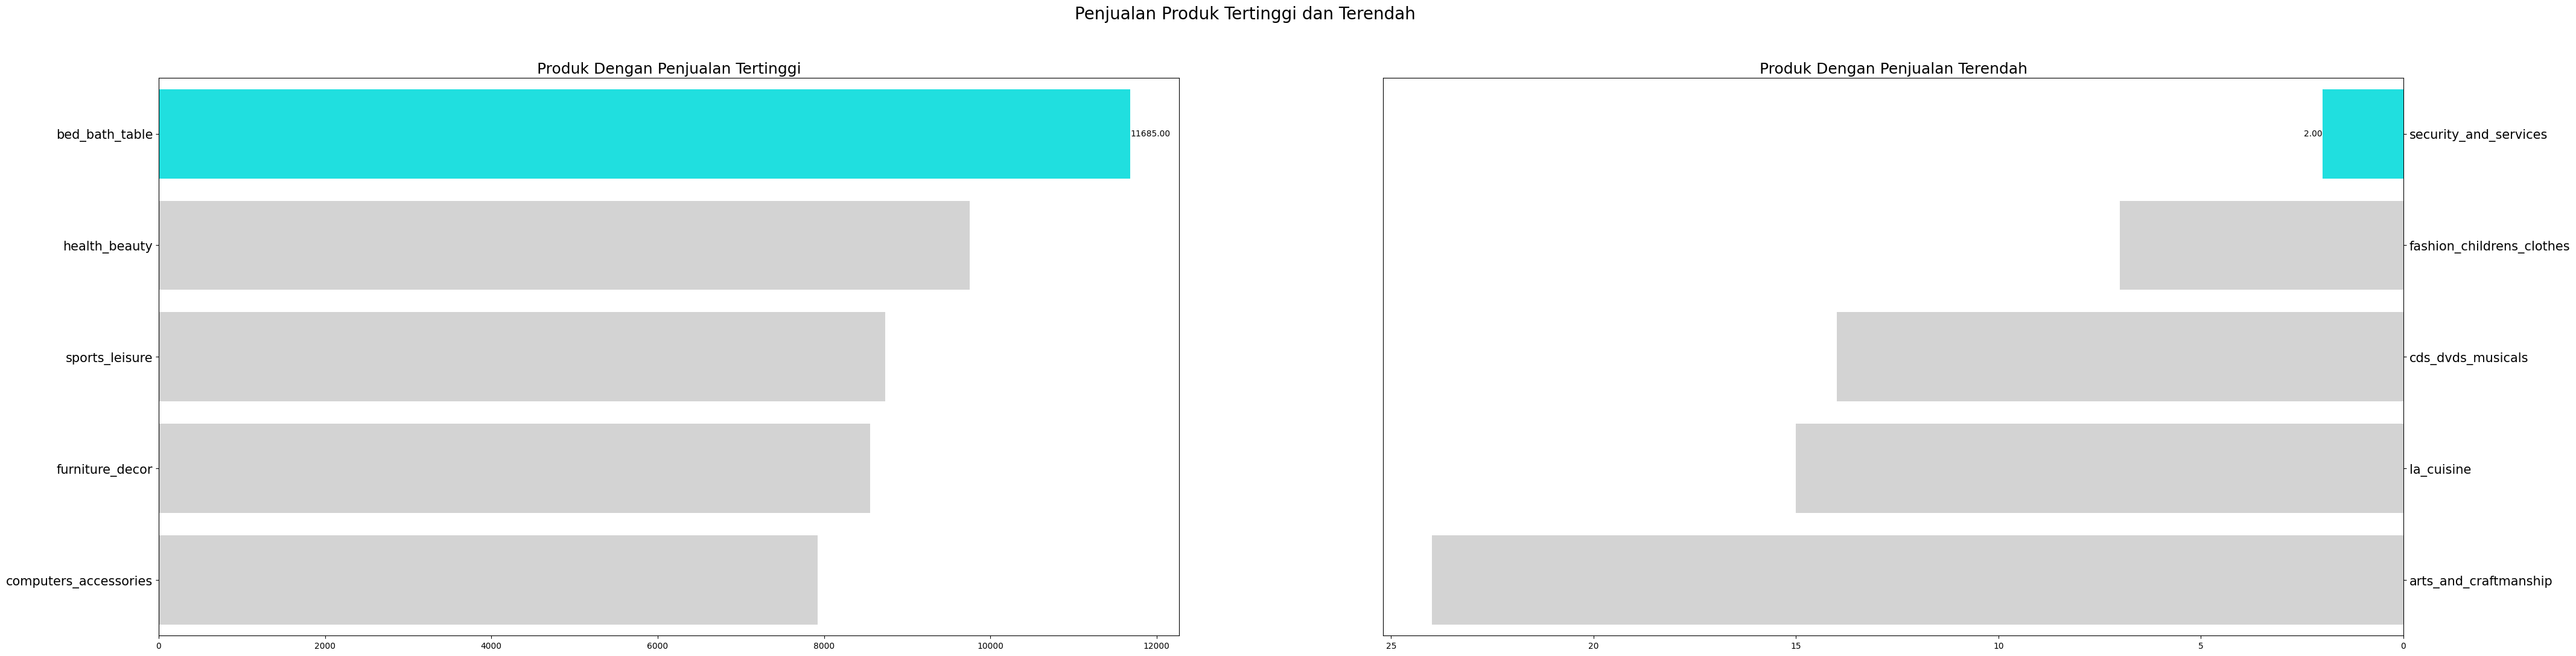

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(48, 12))

colors = ["cyan", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Produk yang paling banyak dijual
sns.barplot(x="products", y="product_category_name_english", data=sum_order_df.head(5), hue="product_category_name_english", palette=colors, dodge=False, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Dengan Penjualan Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Label with specially formatted floats
hbars = ax[0].containers[0]
ax[0].bar_label(hbars, fmt='%.2f')

# Produk yang paling sedikit dijual
sns.barplot(x="products", y="product_category_name_english", data=sum_order_df.sort_values(by="products", ascending=True).head(5), hue="product_category_name_english", palette=colors, dodge=False, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Dengan Penjualan Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Label with specially formatted floats
hbars = ax[1].containers[0]
ax[1].bar_label(hbars, fmt='%.2f')

plt.suptitle("Penjualan Produk Tertinggi dan Terendah", fontsize=20)
plt.show()

Dari grafik di atas, dapat disimpulkan bahwa kategori produk yang paling diminati oleh pelanggan adalah **bed_bath_table** dengan 16885 penjualan, sedangkan produk **security and services** merupakan produk yang memiliki penjualan paling rendah, hanya 2 penjualan.

### **Pertanyaan 2:**
**Bagaimana tingkat kepuasan pelanggan pada tahun 2018?**


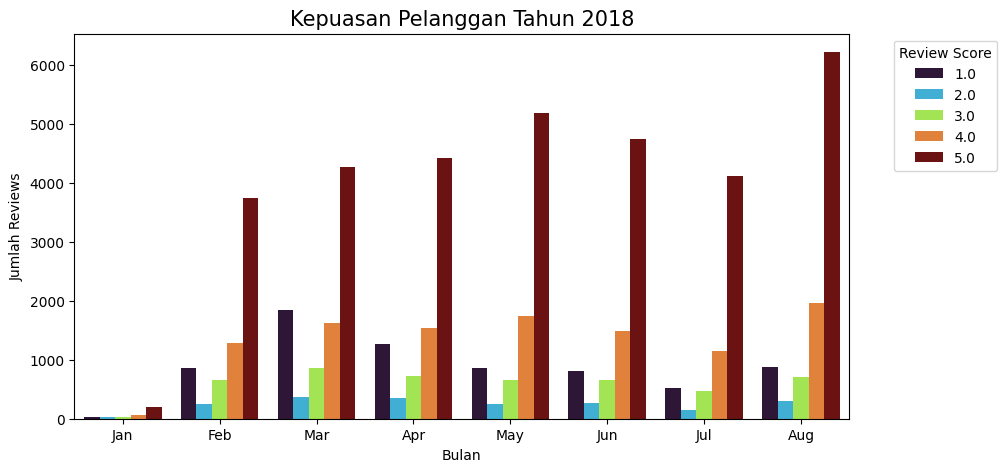

In [63]:
all_data['review_creation_date'] = pd.to_datetime(all_data['review_creation_date'])

# Filter data for the last 8 months
last_six_months_data = all_data[all_data['review_creation_date'] >= all_data['review_creation_date'].max() - pd.DateOffset(months=7)]

# Create a bar plot for review scores by month
plt.figure(figsize=(10, 5))
sns.countplot(x=last_six_months_data['review_creation_date'].dt.month,
              hue=last_six_months_data['review_score'],
              palette="turbo")

plt.title("Kepuasan Pelanggan Tahun 2018", fontsize=15)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Reviews")
plt.legend(title="Review Score", loc='upper right', bbox_to_anchor=(1.2, 1))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
plt.xticks(range(0, 8), months)

plt.show()

In [64]:
avg_review = last_six_months_data['review_score'].mean()
print(f"Average Review Score: {avg_review:.2f}")

Average Review Score: 4.05


Grafik di atas menunjukkan tingkat kepuasan pelanggan yang tinggi terhadap layanan yang diberikan. Hal ini dapat dilihat dari jumlah pelanggan yang memberikan rating 5 memiliki jumlah data paling banyak dibandingkan rating lainnya. Rata-rata review yang diberikan pada tahun 2018 adalah 4.05, atau sudah diatas rata-rata memuaskan.

### **Pertanyaan 3:**
**Bagaimana distribusi penjualan produk tiap bulannya?**

In [65]:
monthly_order = all_data.resample(rule='ME', on='order_approved_at').agg({
    "order_id": "size",
})

In [66]:
monthly_order.index = monthly_order.index.strftime('%B')
monthly_order = monthly_order.reset_index()
monthly_order.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_order

,order_approved_at,order_count
0,October,334
1,November,0
2,December,1
3,January,914
4,February,1892
5,March,3023
6,April,2592
7,May,4170
8,June,3651
9,July,4614


In [67]:
monthly_order = monthly_order.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')
monthly_order

,order_approved_at,order_count
11,September,4938
12,October,5337
14,December,6466
21,July,6979
20,June,7253
22,August,7487
16,February,7653
18,April,7795
15,January,8040
19,May,8254


In [68]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_order["month_numeric"] = monthly_order["order_approved_at"].map(month_mapping)
monthly_order = monthly_order.sort_values("month_numeric")

print(monthly_order)

   order_approved_at  order_count  month_numeric
15           January         8040              1
16          February         7653              2
17             March         8276              3
18             April         7795              4
19               May         8254              5
20              June         7253              6
21              July         6979              7
22            August         7487              8
11         September         4938              9
12           October         5337             10
13          November         8533             11
14          December         6466             12


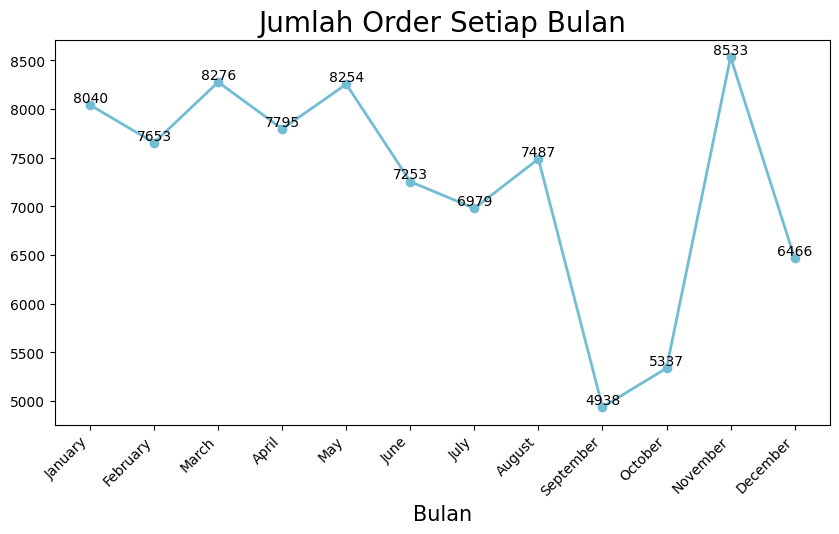

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_order["order_approved_at"],
    monthly_order["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah Order Setiap Bulan", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.xlabel("Bulan", fontsize=15)
plt.yticks(fontsize=10)

# Add value at each data point
for x, y in zip(monthly_order["order_approved_at"], monthly_order["order_count"]):
    label = "{:.0f}".format(y)  # Format the label (e.g., to remove decimals)
    plt.text(x, y, label, ha='center', va='bottom') # Adjust ha and va for label position

plt.show()

Dari visualisasi grafik, terlihat bahwa penjualan terendah pada bulan September, diikuti oleh kenaikan pada bulan Oktober dan kemudian puncaknya naik lagi pada bulan November.

# **Memanggil Dashboard Streamlite**

In [70]:
%pip install  streamlit

Note: you may need to restart the kernel to use updated packages.


In [71]:
!streamlit run dashboard/main.py


^C


# **Analisis Lanjutan (Opsional)**

## **RFM Analysis**

In [72]:
import datetime as dt

now = dt.datetime(2018, 10, 17)

all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_data.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_data.groupby('customer_id')['order_id'].count()
monetary = all_data.groupby('customer_id')['price'].sum()

In [73]:
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

# Calculate Percentiles
rfm_percentiles = rfm[['Recency', 'Frequency', 'Monetary']].rank(pct=True)

# RFM Segmentation
rfm['RFM_Score'] = rfm_percentiles['Recency'] * 100 + rfm_percentiles['Frequency'] * 10 + rfm_percentiles['Monetary']
rfm['RFM_Score'] = rfm['RFM_Score'].clip(0, 100)
rfm_segment = pd.cut(rfm['RFM_Score'], bins=[0, 33, 66, 100], labels=['Low', 'Mid', 'High'])
rfm['Segment'] = rfm_segment

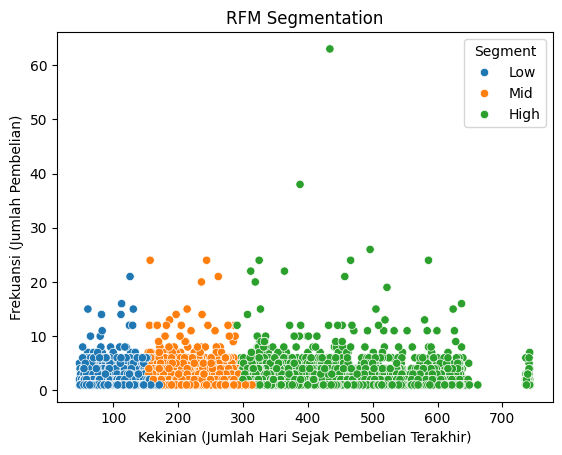

In [74]:
# Visualize RFM Segments
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm)
plt.title('RFM Segmentation')
plt.xlabel('Kekinian (Jumlah Hari Sejak Pembelian Terakhir)')
plt.ylabel('Frekuansi (Jumlah Pembelian)')
plt.show()

Insight :

* Sumbu horizontal (X-axis) menunjukkan nilai Recency, yang merupakan jumlah hari sejak pelanggan melakukan pembelian terakhir. Nilai yang lebih rendah menunjukkan pelanggan yang baru-baru ini melakukan pembelian.
* Sumbu vertikal (Y-axis) menunjukkan nilai Frequency, yaitu jumlah pembelian yang dilakukan oleh pelanggan. Nilai yang lebih tinggi menunjukkan pelanggan yang sering melakukan pembelian.
* Visualisasi tersebut menunjukkan bahwa frequency pembelian customer kebanyakan masih rendah, yaitu <10 pembelian. Juga kebanyakan pembeli telah lama tidak melakukan pembelian, ditandai dengan segment high yang lebih banyak dibandingkan segment lain

### **Keterangan dari kolom-kolom analisis RFM**

* Recency: Menunjukkan seberapa lama pelanggan terakhir kali melakukan pembelian. Semakin kecil nilai Recency, semakin baru pelanggan tersebut melakukan pembelian.

* Frequency: Menunjukkan seberapa sering pelanggan melakukan pembelian dalam suatu periode waktu tertentu. Nilai Frequency yang tinggi menunjukkan bahwa pelanggan tersebut sering melakukan pembelian.

* Monetary: Menunjukkan total nilai pembelian atau pengeluaran yang dilakukan oleh pelanggan. Nilai Monetary yang tinggi menunjukkan bahwa pelanggan tersebut menghabiskan lebih banyak uang.

* RFM_Score: Merupakan nilai skor yang dihasilkan dari kombinasi Recency, Frequency, dan Monetary. RFM Score yang tinggi menunjukkan pelanggan yang masih aktif, berbelanja secara teratur, dan memberikan kontribusi signifikan terhadap pendapatan bisnis.

* Segment: Segment "High" akan berisi pelanggan yang baru-baru ini sering berbelanja dan menghabiskan banyak uang, sedangkan segment "Low" akan berisi pelanggan yang jarang berbelanja dan menghabiskan sedikit uang. Segment "Mid" berada di tengah-tengah, menunjukkan perilaku yang tidak terlalu ekstrem dalam hal Recency, Frequency, dan Monetary.

In [75]:
# Customer dengan pengeluaran terbesar
top_monetary_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)
top_monetary_customers.head()

,customer_id,Recency,Frequency,Monetary,RFM_Score,Segment
8146,1617b1357756262bfa56ab541c47bc16,382,8,13440.00,83.905783,High
82310,de832e8dbb1f588a47013e53feaa67cc,505,15,10856.10,99.940392,High
36711,63b964e79dee32a3587651701a2b8dbf,244,24,9888.00,55.617586,Mid
40915,6f241d5bbb142b6f764387c8c270645a,159,7,9520.14,34.773358,Mid
54008,926b6a6fb8b6081e00b335edaf578d35,546,2,7998.00,100.000000,High


In [76]:
# Customer yang terakhir belanja
recent_customers = rfm.sort_values(by='Recency', ascending=False).head(10)
recent_customers.head()

,customer_id,Recency,Frequency,Monetary,RFM_Score,Segment
81559,dc607dc98d6a11d5d04d9f2a70aa6c34,743,1,74.90,100.0,High
41564,70fc57eeae292675927697fe03ad3ff5,743,1,21.50,100.0,High
46795,7ec40b22510fdbea1b08921dd39e63d8,743,1,21.90,100.0,High
41081,6f989332712d3222b6571b1cf5b835ce,743,1,36.49,100.0,High
44277,7812fcebfc5e8065d31e1bb5f0017dae,743,1,29.99,100.0,High


In [77]:
# Customer dengan pembelian terbanyak
top_frequency_customers = rfm.sort_values(by='Frequency', ascending=False).head(10)
top_frequency_customers.head()

,customer_id,Recency,Frequency,Monetary,RFM_Score,Segment
14490,270c23a11d024a44c896d1894b261a83,434,63,2305.38,91.302697,High
7224,13aa59158da63ba0e93ec6ac2c07aacb,388,38,3039.62,84.745671,High
54154,92cd3ec6e2d643d4ebd0e3d6238f69e2,496,26,1299.74,98.857161,High
40808,6ee2f17e3b6c33d6a9557f280edd2925,586,24,4557.60,100.000000,High
16186,2ba91e12e5e4c9f56b82b86d9031d329,325,24,2397.60,73.574933,High


# **Conclusion**

## **Seperti apa distribusi penjualan produk dengan penjualan tertinggi dan terendah?**


Dari grafik di atas, dapat disimpulkan bahwa kategori produk yang paling diminati oleh pelanggan adalah **bed_bath_table** dengan 16885 penjualan, sedangkan produk **security and services** merupakan produk yang memiliki penjualan paling rendah, hanya 2 penjualan.

## **Bagaimana tingkat kepuasan pelanggan pada tahun 2018?**


Grafik di atas menunjukkan tingkat kepuasan pelanggan yang tinggi terhadap layanan yang diberikan. Hal ini dapat dilihat dari jumlah pelanggan yang memberikan rating 5 memiliki jumlah data paling banyak dibandingkan rating lainnya. Rata-rata review yang diberikan pada tahun 2018 adalah 4.05, atau sudah diatas rata-rata memuaskan.

## **Bagaimana distribusi penjualan produk tiap bulannya?**

Dari visualisasi grafik, terlihat bahwa penjualan terendah pada bulan September, diikuti oleh kenaikan yang signifikan pada bulan Oktober dan kemudian naik lagi pada bulan November.

REQUIREMENT

In [78]:
!pip freeze>requirements.txt